## 数据预处理

### 导入数据

In [27]:
import pandas as pd
from collections import Counter

df_train = pd.read_csv('data/train.csv') # 训练集
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304888 entries, 0 to 304887
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304888 non-null  int64  
 1   Gender                304888 non-null  object 
 2   Age                   304888 non-null  int64  
 3   Driving_License       304010 non-null  float64
 4   Region_Code           304888 non-null  float64
 5   Previously_Insured    304888 non-null  int64  
 6   Vehicle_Age           304888 non-null  object 
 7   Vehicle_Damage        304888 non-null  object 
 8   Annual_Premium        304888 non-null  float64
 9   Policy_Sales_Channel  304007 non-null  float64
 10  Vintage               304888 non-null  int64  
 11  Response              304888 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 27.9+ MB


### 数据格式处理（未升维）

In [28]:
# 数据格式处理
num_feat = ['Age', 'Vintage', 'Annual_Premium'] # 数值属性
nor_feat = ['Gender', 'Driving_License', 'Region_Code', 'Vehicle_Damage',  'Vehicle_Age', 'Policy_Sales_Channel', 'Previously_Insured'] # 标称属性

df_train['Gender'] = df_train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_train['Region_Code'] = df_train['Region_Code'].astype(int)
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].map( {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2} ).astype(int)
# df_train['Policy_Sales_Channel'] = df_train['Policy_Sales_Channel'].astype(int)
# df_train['Driving_License'] = df_train['Driving_License'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304888 entries, 0 to 304887
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304888 non-null  int64  
 1   Gender                304888 non-null  int32  
 2   Age                   304888 non-null  int64  
 3   Driving_License       304010 non-null  float64
 4   Region_Code           304888 non-null  int32  
 5   Previously_Insured    304888 non-null  int64  
 6   Vehicle_Age           304888 non-null  int32  
 7   Vehicle_Damage        304888 non-null  int32  
 8   Annual_Premium        304888 non-null  float64
 9   Policy_Sales_Channel  304007 non-null  float64
 10  Vintage               304888 non-null  int64  
 11  Response              304888 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 23.3 MB


### 缺失值处理
写了三种方法，自行选择
* 删除含有空值的行
* 逻辑回归填充`Driving_License` + 轮盘法填充 `Policy_Sales_Channel`
* 全部轮盘法填充

#### 1、删除含有空值的行

In [ ]:
# 缺失值检测处理：删除含有空值的行（标称属性）
df_train.dropna(axis=0, how='any', inplace=True)


#### 2、逻辑回归
*自行修改轮盘法`null_pro`*

In [ ]:
# 缺失值检测处理：逻辑回归（标称属性）

# 划分缺失值行

list_null = []
list_notnull = []

null_pro = ['Driving_License']
for pro in null_pro:                        
    for index in range(len(df_train[pro])):
        if pd.isnull(df_train[pro][index]):
            list_null.append(df_train[index:index+1])
        else:
            list_notnull.append(df_train[index:index+1])
df_null = pd.concat(list_null)
df_notnull = pd.concat(list_notnull)


In [ ]:
# 划分data、label
train_dl = df_notnull["Driving_License"]
train_data = df_notnull.drop(['Response', 'id', 'Driving_License', 'Policy_Sales_Channel'], axis = 1)

test_data = df_null.drop(['Response', 'id', 'Driving_License', 'Policy_Sales_Channel'], axis = 1)

In [ ]:
# 调用逻辑回归
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(train_data, train_dl)
predict_dl = lr.predict(test_data)

index_pdl = 0
for pro in null_pro:                        
    for index in range(len(df_train[pro])):
        if pd.isnull(df_train[pro][index]):
            df_train[pro][index] = predict_dl[index_pdl]
            index_pdl += 1

df_train.info()

#### 3、轮盘法

In [29]:
# 缺失值检测处理：轮盘法按概率填充（标称属性）
import random

null_pro = ['Driving_License', 'Policy_Sales_Channel']
for pro in null_pro:
    countPro = Counter([x for x in df_train[pro] if pd.isnull(x) == False])
    sumPro = sum(countPro.values())
    for index in range(len(df_train[pro])):
        if pd.isnull(df_train[pro][index]):
            needle = random.random() 
            needle *= sumPro
            for cur in countPro.most_common():
                needle -= cur[1]
                if needle <= 0:
                    df_train[pro][index] = cur[0]
                    break
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304888 entries, 0 to 304887
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304888 non-null  int64  
 1   Gender                304888 non-null  int32  
 2   Age                   304888 non-null  int64  
 3   Driving_License       304888 non-null  float64
 4   Region_Code           304888 non-null  int32  
 5   Previously_Insured    304888 non-null  int64  
 6   Vehicle_Age           304888 non-null  int32  
 7   Vehicle_Damage        304888 non-null  int32  
 8   Annual_Premium        304888 non-null  float64
 9   Policy_Sales_Channel  304888 non-null  float64
 10  Vintage               304888 non-null  int64  
 11  Response              304888 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 23.3 MB


### 后续数据处理

In [30]:
# 数据格式处理
df_train['Policy_Sales_Channel'] = df_train['Policy_Sales_Channel'].astype(int)
df_train['Driving_License'] = df_train['Driving_License'].astype(int)

### 标准化
*处理数值属性`num_feat`*

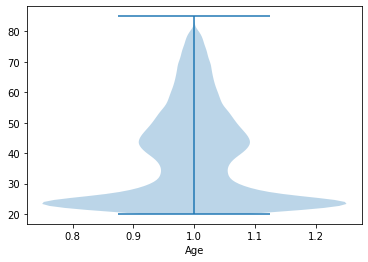

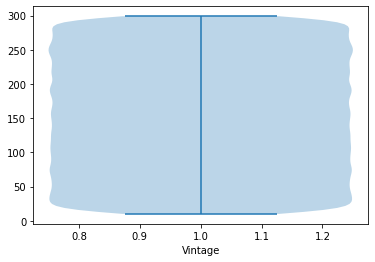

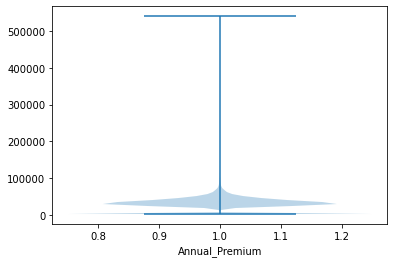

In [31]:
import matplotlib.pyplot as plt
for feat in num_feat:
    plt.violinplot(df_train[feat])
    plt.xlabel(feat)
    plt.show()

由以上琴形图，可知`Annual_Premium`分布很不均匀，故采用`z-score`标准化，其他则采用最大最小标准化。

In [32]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
import numpy as np

# age_scaler = MinMaxScaler()
df_train['Age'] = (df_train['Age'] - min(df_train['Age']))/(max(df_train['Age']) - min(df_train['Age']))

# vintage_scaler = MinMaxScaler()
df_train['Vintage'] = (df_train['Vintage'] - min(df_train['Vintage']))/(max(df_train['Vintage']) - min(df_train['Vintage']))

# psc_scaler = StandardScaler() 
df_train['Annual_Premium'] = (df_train['Annual_Premium'] - np.mean(df_train['Annual_Premium'] )) / (np.std(df_train['Annual_Premium']))

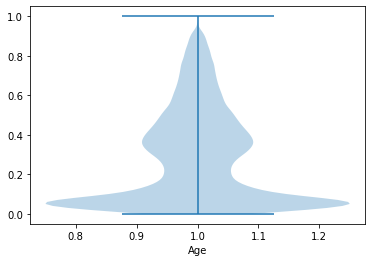

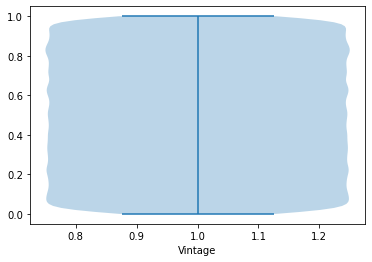

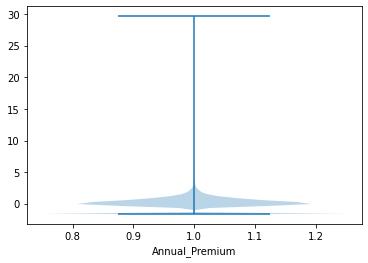

In [33]:
for feat in num_feat:
    plt.violinplot(df_train[feat])
    plt.xlabel(feat)
    plt.show()

In [ ]:
# 划分数据
from sklearn.model_selection import train_test_split
train_id = df_train['id']
train_target = df_train['Response']
train = df_train.drop(['Response', 'id'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, test_size = 0.3,random_state = 0)
# x_test,x_left,y_test,y_left = train_test_split(x_left,y_left, test_size = 0.1,random_state = 0)



In [ ]:
x_train.info()

In [ ]:
# 使用决策树简单尝试
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)

print(classification_report(y_test, tree.predict(x_test)))
                                                                        
print("模型训练集的准确率：%.3f" %tree.score(x_train, y_train))
print("模型测试集的准确率：%.3f" %tree.score(x_test, y_test))

In [ ]:
# 使用Logistic
from sklearn import linear_model
from sklearn.metrics  import classification_report
lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)

# print(classification_report(y_train, ))
Counter(lr.predict(x_train))
# print("模型训练集的准确率：%.3f" %lr.score(x_train, y_train))
# print("模型测试集的准确率：%.3f" %lr.score(x_test, y_test))